In [14]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import AffinityPropagation, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 15.0)

Populating the interactive namespace from numpy and matplotlib


In [30]:
m = Word2Vec.load('../MediaCloud_w2v')

In [27]:
def cluster_vectors(model, nclusters):
    """
    Cluster the word vectors using one of a few possible models
    :param model: Word2vec model
    :param method: cluster model used. Default is minibatch K-means
    """
    X = model.syn0

    print("Computing MiniBatchKmeans clustering")
    km = MiniBatchKMeans(n_clusters=nclusters, batch_size=200).fit(X)
    labels = km.labels_
    n_clusters_ = len(km.cluster_centers_)
    print('Estimated number of clusters: %d' % n_clusters_)
    return X, labels

In [28]:
def extract_cluster(model, labels, label=1):
    """
    Extract a cluster from the word vectors
    :param model: Word2vec model
    :param labels: list with cluster labels attributed to each word in the model
    :param label: label if the cluster to extract
    :return:
    """
    indices = [i for i in range(len(labels)) if labels[i] == label]
    palavras = [model.index2word[i] for i in indices]
    return palavras

In [47]:
nc=1000
X,l = cluster_vectors(m, nc)

Computing MiniBatchKmeans clustering
Estimated number of clusters: 1000


/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:1273: RuntimeWarning: init_size=600 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)


Vamos agora ver a distribuição de tamanhos de clusters

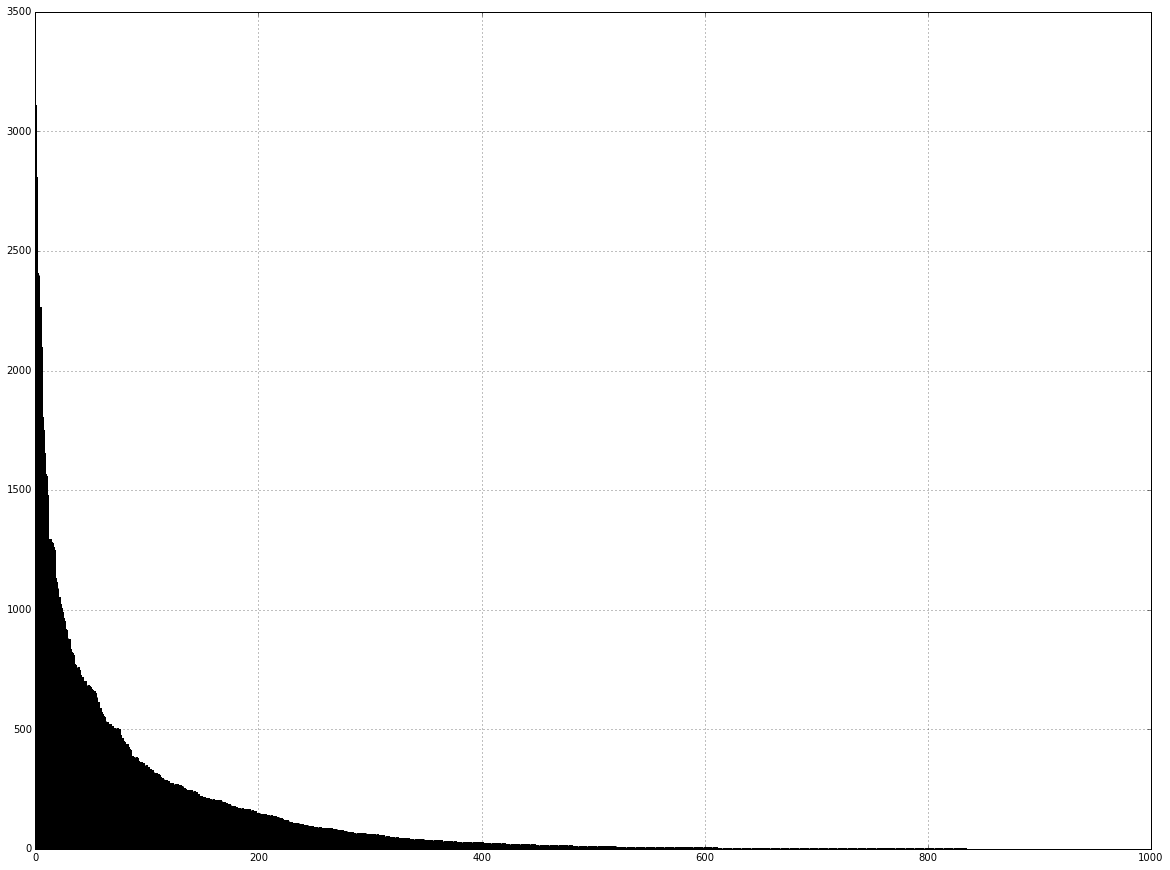

In [48]:
h = Counter(l)
o = OrderedDict(sorted(h.items(),key=lambda x:x[1], reverse=True))
plt.bar(left=range(nc),height=o.values());
#plt.hist(l, bins=100);
plt.grid()

In [7]:
rf = open('nomes.csv', 'w')
try:
    for label in l:
        print(extract_cluster(m,l,label))
        nome = input("Que assunto melhor representa o grupo de palavras acima?")
        rf.write("{}, {}\n".format(label, nome))
finally:
    rf.close()

['', 'antiausteridade', 'esmerilhadeira', 'nomenclatura', 'selecta', 'nº5', 'tpb', 'makonde', 'comba', 'aramina', '15m', 'inspeciona', 'polaris', 'drostanolona', 'tabi', 'carbide', 'tripalavra', 'shui', 'sakwa', 'bushido', 'jv', 'lumara', 'fal', 'arp', 'splitplay', 'importada', 'reaçonaria', 'pej', '2000', 'mersin', 'arxo', 'ev', 'reman', 'coluna4', 'fo', 'yawanawá', 'cacher', 'begum', 'recicle', 'uarlen', 'lista_arquivosatual', 'ais', '–', 'executará', 'kenta', 'adquirida', 'bettina', 'além', 'stapp', 'argos', 'd', 'confeccionando', '5m³', 'versão', 'harpia', '8703896399402133096', 'acorco', 'ning', 'cri', 'anexaram', 'compania', 'panzer', 'basarnas', 'lusail', 'imerys', 'pala', 'faina', 'suntory', 'squaresoft', 'leiloa', 'tivo', 'necessár', 'versa', 'pollicita', 'aas', 'esport', 'messes', 'marymargret', 'mentos', 'aps', 'ergo', 'fritadeira', 'noe', 'meridiano', 'kale', 'tda', 'cacaio', 'ayan', 'hololens', 'apor', 'mecanizado', 'terabits', 'fatality', '4620', 'rse', 'colmeia', '100000

KeyboardInterrupt: 

In [50]:
extract_cluster(m,l,677)

['esconder',
 'riu',
 'engordar',
 'irónico',
 'andando',
 'espalhafatoso',
 'galhofa',
 'implorou',
 'durona',
 'envergonhou',
 'riscou',
 'imagine',
 'intocado',
 'colérico',
 'loucura',
 'travesso',
 'rebentar',
 'arrebenta',
 'peitos',
 'cuspir',
 'limpinha',
 'bonachão',
 'mudo',
 'revirar',
 'atinou',
 'apuros',
 'navalha',
 'masmorra',
 'alfabetizada',
 'movia',
 'trocadilho',
 'mansinho',
 'brilhavam',
 'pairando',
 'fatiando',
 'trela',
 'infernal',
 'coiote',
 'desmancha',
 'aborrecido',
 'idolatra',
 'borbotões',
 'abraçando',
 'chilique',
 'arredio',
 'repararam',
 'saíamos',
 'inquieta',
 'deselegante',
 'sábio',
 'candura',
 'moçada',
 'pindaíba',
 'guerreira',
 'confinada',
 'calo',
 'musiquinhas',
 'eis',
 'flâmula',
 'bracken',
 'deparar',
 'desconexa',
 'vagar',
 'falastrão',
 'jazia',
 'odeio',
 'estatura',
 'presenteado',
 'invejoso',
 'quietude',
 'esquizofrênico',
 'desencarnou',
 'escolhia',
 'depressiva',
 'exultante',
 'afrodisíaco',
 'taca',
 'moreninho',
 're

In [49]:
sorted(h.items(),key=lambda x:x[1])

[(3, 1),
 (6, 1),
 (7, 1),
 (12, 1),
 (14, 1),
 (18, 1),
 (24, 1),
 (32, 1),
 (36, 1),
 (37, 1),
 (39, 1),
 (46, 1),
 (48, 1),
 (50, 1),
 (56, 1),
 (65, 1),
 (70, 1),
 (79, 1),
 (93, 1),
 (95, 1),
 (96, 1),
 (99, 1),
 (101, 1),
 (112, 1),
 (114, 1),
 (122, 1),
 (141, 1),
 (168, 1),
 (173, 1),
 (186, 1),
 (193, 1),
 (194, 1),
 (198, 1),
 (199, 1),
 (203, 1),
 (206, 1),
 (214, 1),
 (225, 1),
 (230, 1),
 (256, 1),
 (258, 1),
 (260, 1),
 (262, 1),
 (264, 1),
 (272, 1),
 (273, 1),
 (278, 1),
 (290, 1),
 (308, 1),
 (311, 1),
 (314, 1),
 (316, 1),
 (323, 1),
 (332, 1),
 (346, 1),
 (352, 1),
 (354, 1),
 (359, 1),
 (362, 1),
 (366, 1),
 (370, 1),
 (377, 1),
 (382, 1),
 (391, 1),
 (402, 1),
 (405, 1),
 (413, 1),
 (421, 1),
 (428, 1),
 (459, 1),
 (462, 1),
 (466, 1),
 (475, 1),
 (480, 1),
 (483, 1),
 (485, 1),
 (492, 1),
 (506, 1),
 (512, 1),
 (514, 1),
 (519, 1),
 (522, 1),
 (523, 1),
 (524, 1),
 (532, 1),
 (533, 1),
 (536, 1),
 (545, 1),
 (552, 1),
 (560, 1),
 (563, 1),
 (577, 1),
 (579, 1),
 (